# Description

It projects input data into a UMAP representation.

# Modules loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from IPython.display import display

import numpy as np
import pandas as pd

import conf
from utils import generate_result_set_name

# Settings

In [3]:
np.random.seed(0)

In [4]:
NULL_DIR = conf.RESULTS["CLUSTERING_NULL_DIR"] / "shuffle_genes"

## Input data

In [5]:
INPUT_FILEPATH_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [6]:
INPUT_FILEPATH = Path(
    NULL_DIR,
    "data_transformations",
    "z_score_std",
    f"z_score_std-{INPUT_FILEPATH_STEM}.pkl",
).resolve()
display(INPUT_FILEPATH)

input_filepath_stem = INPUT_FILEPATH.stem
display(input_filepath_stem)

PosixPath('/opt/data/results/clustering/null_sims/shuffle_genes/data_transformations/z_score_std/z_score_std-projection-smultixcan-efo_partial-mashr-zscores.pkl')

'z_score_std-projection-smultixcan-efo_partial-mashr-zscores'

## Output folder

In [7]:
# output dir for this notebook
RESULTS_DIR = Path(NULL_DIR, "data_transformations", "umap").resolve()
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

display(RESULTS_DIR)

PosixPath('/opt/data/results/clustering/null_sims/shuffle_genes/data_transformations/umap')

## UMAP options

In [8]:
# parameters of the dimentionality reduction steps
# note that these are the default parameters of UMAP (metric and n_neighbors)
DR_OPTIONS = {
    "n_components": [5, 10, 20, 30, 40, 50],
    "metric": "euclidean",
    "n_neighbors": 15,
    "random_state": 0,
}

In [9]:
# dictionary containing all options/settings (used to generate filenames)
ALL_OPTIONS = DR_OPTIONS.copy()

display(ALL_OPTIONS)

{'n_components': [5, 10, 20, 30, 40, 50],
 'metric': 'euclidean',
 'n_neighbors': 15,
 'random_state': 0}

# Load input file

In [10]:
data = pd.read_pickle(INPUT_FILEPATH)

In [11]:
display(data.shape)

(3752, 987)

In [12]:
display(data.head())

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV978,LV979,LV980,LV981,LV982,LV983,LV984,LV985,LV986,LV987
100001_raw-Food_weight,-0.175043,-0.710171,-1.000846,0.693026,0.409413,0.642958,1.767862,-1.070425,0.809395,-1.555050,...,-0.932802,0.371349,-0.521787,-0.881136,-1.193309,-0.257883,1.382268,0.066549,-0.866086,0.847997
100002_raw-Energy,0.531227,0.894062,1.191552,-0.143922,0.217867,0.529878,0.219561,-1.538143,-0.166704,1.042749,...,-0.601329,0.625139,-0.113048,-1.477163,0.746773,0.316892,-0.660407,1.501067,0.543744,1.094294
100003_raw-Protein,0.405395,0.925288,-0.339507,0.799476,-0.512075,0.586632,0.361706,0.226860,1.208289,-1.880931,...,-0.489171,0.276717,-0.159505,-1.271106,0.300351,0.595915,0.509020,-0.127540,-0.811987,-1.108812
100004_raw-Fat,-0.156230,0.881426,0.395527,-1.570256,1.240955,2.064595,-0.547373,-1.228389,0.319684,0.858253,...,-0.407151,-1.217662,-0.361052,0.813221,-0.692981,1.099523,-0.017366,0.361278,-0.017222,1.750511
100005_raw-Carbohydrate,-0.142531,-0.521907,1.069304,0.548122,-0.422146,-1.330718,-1.260872,1.003617,1.266289,0.065408,...,1.506698,-0.069854,-0.084662,-1.269536,-0.421185,0.431180,1.673162,-0.954336,0.026593,0.655359


# UMAP

**Reproducibility problem**: there seems to be a bug with UMAP in which it produces different results in different operating systems or machines: https://github.com/lmcinnes/umap/issues/153

In [13]:
from data.dimreduction import get_umap_proj

In [14]:
# Get a UMAP representation for all n_components configurations
for n_comp in DR_OPTIONS["n_components"]:
    print(f"# components: {n_comp}")

    # prepare options of n_comp
    options = ALL_OPTIONS.copy()
    options["n_components"] = n_comp
    options = {k: v for k, v in options.items() if k in DR_OPTIONS}

    # get projection
    dr_data = get_umap_proj(data, options)

    # check data dimensionality
    display(dr_data.shape)
    assert dr_data.shape == (data.shape[0], n_comp)

    display(dr_data.iloc[:, 0:5].describe())

    # save
    output_file = Path(
        RESULTS_DIR,
        generate_result_set_name(
            options, prefix=f"umap-{input_filepath_stem}-", suffix=".pkl"
        ),
    ).resolve()
    display(output_file)

    dr_data.to_pickle(output_file)

    print("\n")

# components: 5


'UMAP object: UMAP(n_components=5, random_state=0)'

(3752, 5)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000
mean,6.760682,4.948755,3.022130,5.206808,4.487328
std,0.774131,0.945516,0.977573,1.216423,1.250528
min,5.307208,2.182059,0.837561,3.038014,1.975181
25%,6.085819,4.411669,2.223984,4.233274,3.529367
50%,6.747993,5.173911,3.101154,4.977086,3.994362
75%,7.417014,5.536009,3.670772,5.938569,5.744973
max,8.507563,6.857872,5.000435,7.880574,6.929384


PosixPath('/opt/data/results/clustering/null_sims/shuffle_genes/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_5-n_neighbors_15-random_state_0.pkl')



# components: 10


'UMAP object: UMAP(n_components=10, random_state=0)'

(3752, 10)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000
mean,3.266332,4.963990,6.919948,4.562739,5.573095
std,0.857583,0.757113,0.854438,0.663846,1.201065
min,1.676695,3.277304,4.938774,2.952348,3.486021
25%,2.450263,4.499580,6.290903,4.153571,4.389970
50%,3.455907,4.944475,7.083889,4.439445,5.758976
75%,3.973859,5.523113,7.474071,5.123311,6.652614
max,5.049070,6.527365,8.703231,5.876200,7.574119


PosixPath('/opt/data/results/clustering/null_sims/shuffle_genes/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_10-n_neighbors_15-random_state_0.pkl')



# components: 20


'UMAP object: UMAP(n_components=20, random_state=0)'

(3752, 20)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000
mean,3.341511,5.123349,7.039364,4.584998,5.764334
std,0.587212,0.871443,0.586231,0.322508,0.689085
min,2.031661,3.715393,5.735055,3.615061,3.983372
25%,2.880304,4.352824,6.544469,4.392309,5.217297
50%,3.312414,4.760736,7.188064,4.630358,5.883204
75%,3.769808,6.033290,7.551423,4.765970,6.373325
max,4.545413,6.751221,8.126904,5.240717,6.914785


PosixPath('/opt/data/results/clustering/null_sims/shuffle_genes/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_20-n_neighbors_15-random_state_0.pkl')



# components: 30


'UMAP object: UMAP(n_components=30, random_state=0)'

(3752, 30)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000
mean,3.234283,5.100101,7.120335,4.702572,5.800004
std,0.212975,0.471599,0.435108,0.523185,0.827777
min,2.548997,3.804460,6.272411,3.461290,4.156758
25%,3.148890,4.749535,6.722409,4.464721,4.962163
50%,3.253776,5.093155,7.150829,4.795052,6.136963
75%,3.369965,5.573729,7.538599,5.124243,6.581359
max,3.654894,5.896666,7.934322,5.544292,6.979248


PosixPath('/opt/data/results/clustering/null_sims/shuffle_genes/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_30-n_neighbors_15-random_state_0.pkl')



# components: 40


'UMAP object: UMAP(n_components=40, random_state=0)'

(3752, 40)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000
mean,3.269805,5.109083,7.026703,4.688454,5.634338
std,0.277297,0.244551,0.322971,0.304640,0.682825
min,2.588948,4.524493,6.442784,4.103686,4.250436
25%,3.001142,4.933117,6.741318,4.439756,4.943081
50%,3.369359,5.138298,6.984509,4.626638,5.718923
75%,3.484498,5.286354,7.312590,4.974390,6.250183
max,3.754134,5.715561,7.781538,5.394100,6.662910


PosixPath('/opt/data/results/clustering/null_sims/shuffle_genes/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_40-n_neighbors_15-random_state_0.pkl')



# components: 50


'UMAP object: UMAP(n_components=50, random_state=0)'

(3752, 50)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000
mean,3.205075,5.051573,2.913074,5.305911,4.324093
std,0.211137,0.210835,0.260354,0.222318,0.715491
min,2.681910,4.658609,2.225603,4.617451,3.150279
25%,3.079652,4.894496,2.704714,5.157125,3.674518
50%,3.220470,5.024004,2.933978,5.311011,4.186584
75%,3.353522,5.182472,3.126830,5.465475,5.122048
max,3.698004,5.709177,3.430757,5.851099,5.599285


PosixPath('/opt/data/results/clustering/null_sims/shuffle_genes/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_50-n_neighbors_15-random_state_0.pkl')

## Plots

In [15]:
import seaborn as sns

Plot the data from the UMAP version with 5 components.

In [16]:
# prepare options of 5 components
options = ALL_OPTIONS.copy()
options["n_components"] = 5
options = {k: v for k, v in options.items() if k in DR_OPTIONS}

# load
input_file = Path(
    RESULTS_DIR,
    generate_result_set_name(
        options, prefix=f"umap-{input_filepath_stem}-", suffix=".pkl"
    ),
).resolve()

dr_data = pd.read_pickle(input_file)

## Full plot

[2022-11-25 04:29:02,057 - numexpr.utils] INFO: Note: NumExpr detected 48 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
[2022-11-25 04:29:02,057 - numexpr.utils] INFO: NumExpr defaulting to 8 threads.


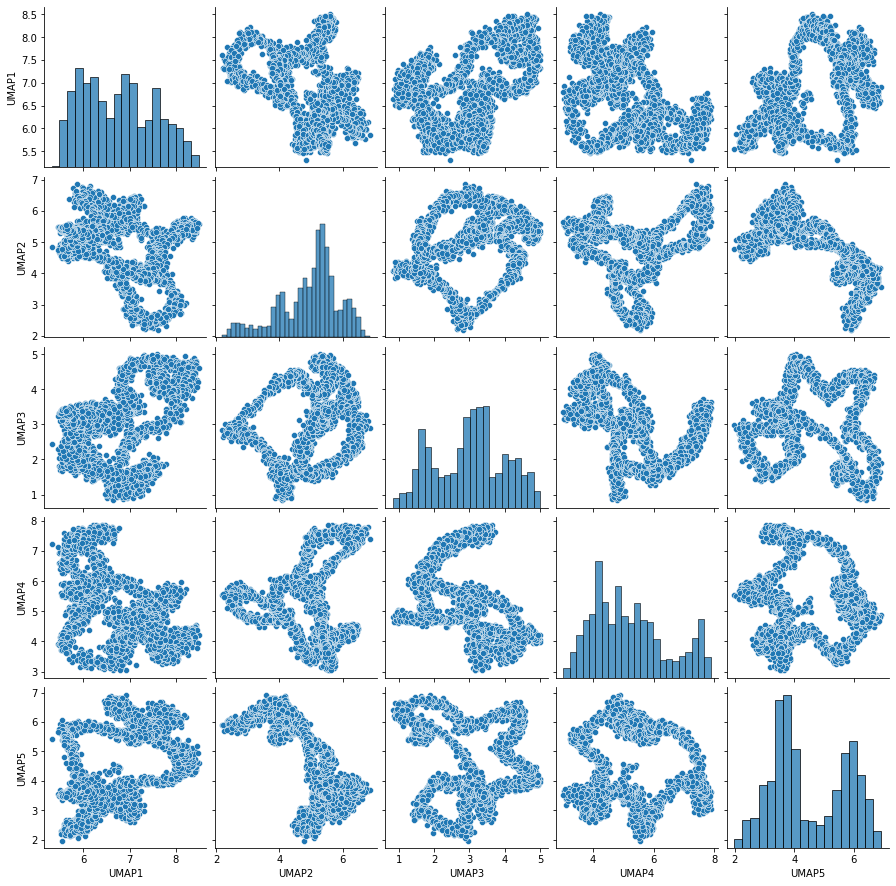

In [17]:
g = sns.pairplot(data=dr_data)

## Full plot (density)

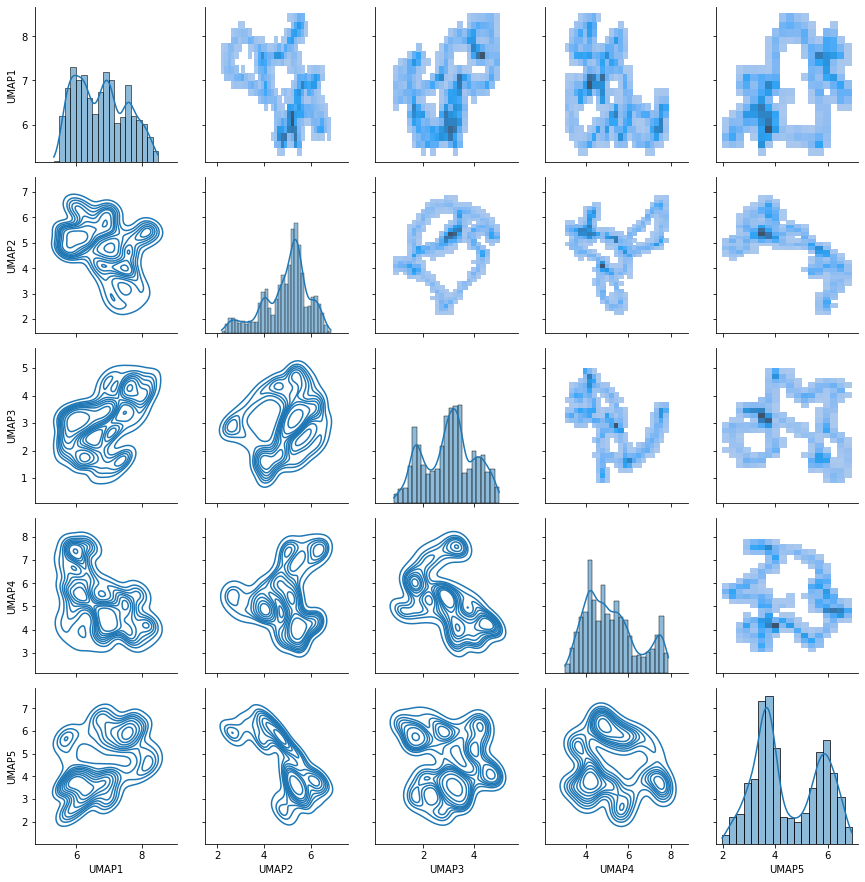

In [18]:
g = sns.PairGrid(data=dr_data)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=False)
g.map_diag(sns.histplot, kde=True)

## Density plot without "outliers"

In [19]:
# remove "outliers" just to take a look at the big cluster
dr_data_thin = dr_data[(dr_data["UMAP1"] < 10) & (dr_data["UMAP2"] < 5)]

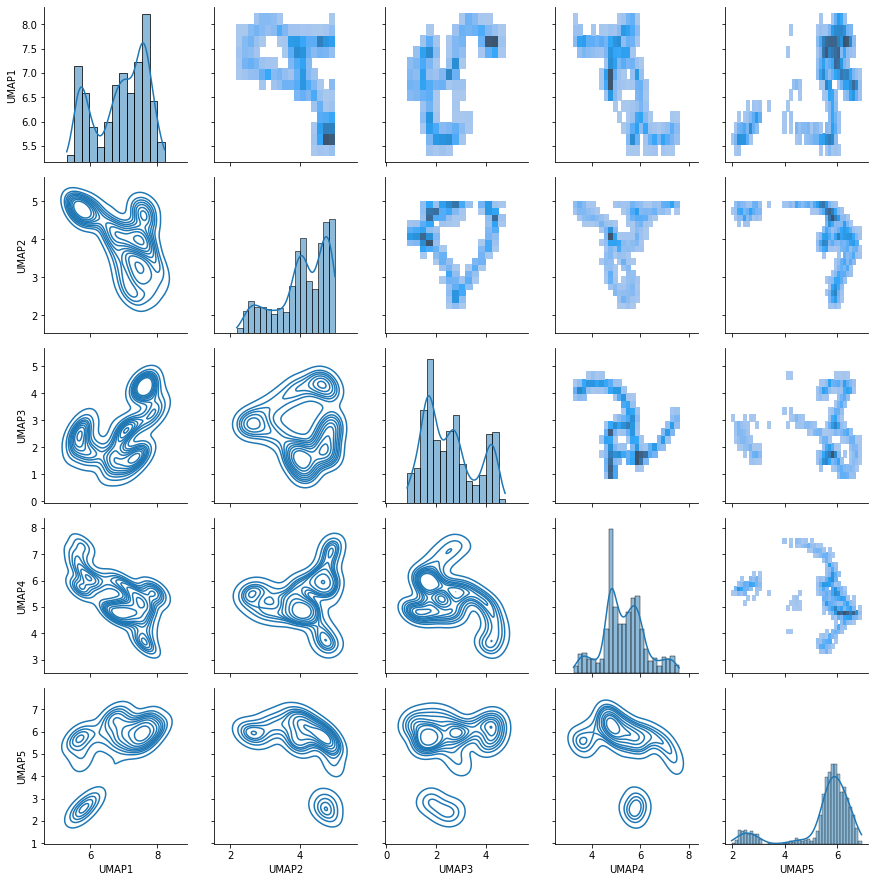

In [20]:
g = sns.PairGrid(data=dr_data_thin)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=False)
g.map_diag(sns.histplot, kde=True)